In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils
%aimport utils.path
%aimport utils.backtest
%aimport utils.backtest_result
%aimport solvers
%aimport solvers.DRconditionalmeanvariance

In [2]:
import tushare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import sys
import factors

# Mean-Variance

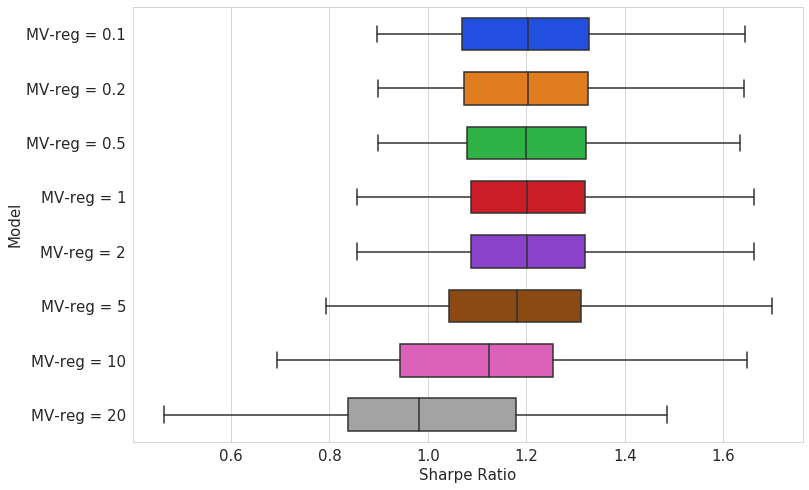

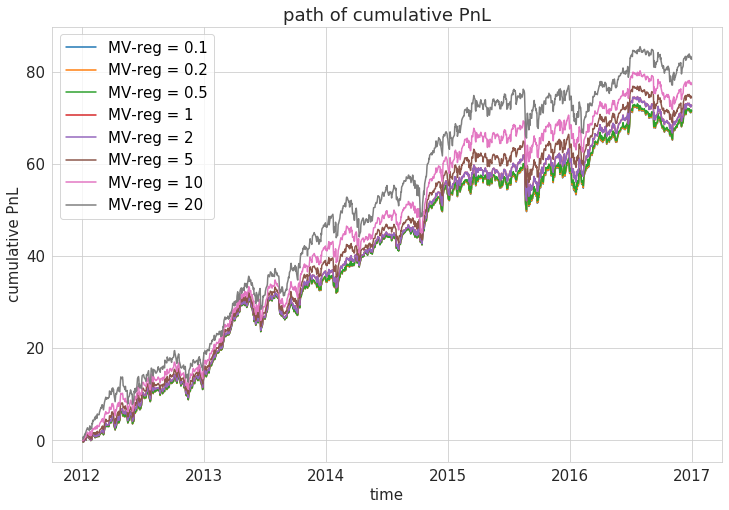

Sharpe Ratio:
MV-reg = 0.1                                      	mean:1.213	std:0.185
MV-reg = 0.2                                      	mean:1.213	std:0.184
MV-reg = 0.5                                      	mean:1.215	std:0.182
MV-reg = 1                                        	mean:1.217	std:0.177
MV-reg = 2                                        	mean:1.217	std:0.177
MV-reg = 5                                        	mean:1.181	std:0.192
MV-reg = 10                                       	mean:1.104	std:0.224
MV-reg = 20                                       	mean:0.998	std:0.263
PnL stats:
MV-reg = 0.1                                      	mean:0.057	std:0.745
MV-reg = 0.2                                      	mean:0.057	std:0.745
MV-reg = 0.5                                      	mean:0.057	std:0.745
MV-reg = 1                                        	mean:0.058	std:0.754
MV-reg = 2                                        	mean:0.058	std:0.754
MV-reg = 5                             

In [5]:
models = []
reg_params_list = [0.1,0.2,0.5,1,2,5,10,20]
for reg_params in reg_params_list:
    mean_variance_model = utils.backtest_result.ModelConfig(
        model_name = 'MV-reg = {}'.format(reg_params),
        solver = solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
        solver_name_prefix = 'vanilla_',
        reg_params = reg_params
    )
    models.append(mean_variance_model)
utils.backtest_result.plot_backtest_result(
    exp_num=50, 
    seed=42, 
    model_config_list = models)

In [6]:
equal_weight_model = utils.backtest_result.ModelConfig(
    model_name = 'Equal Weighted',
    solver = solvers.simple.equal_weight
)
mean_variance_model = utils.backtest_result.ModelConfig(
    model_name = 'Mean Variance Model',
    solver = solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
    solver_name_prefix = 'vanilla_',
    reg_params = 1
)
conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'Conditional Mean Variance',
    solver = solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
    solver_name_prefix = 'fama_french_',
    reg_params = 1
)
DR_model = utils.backtest_result.ModelConfig(
    model_name = 'DR model',
    solver = solvers.DRmeanvariance.DR_mean_variance_long_only_opt_mosek_kernel_p2,
    delta = 0.1,
    p = 2,
    reg_params = 1
)
Winf_DR_conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'Winfinity DR Conditional',
    solver = solvers.DRconditionalmeanvariance.DR_Winfty_conditional_mean_variance_long_only_opt_cvx_kernel, 
    reg_params = 1, 
    gamma_quantile = 0.25, 
    rho_quantile = 0.25
)
W2_DR_conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'W2 DR Conditional',
    solver = solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel, 
    reg_params = 1, 
    epsilon = 0.2, 
    rho_div_rho_min = 1.2
)

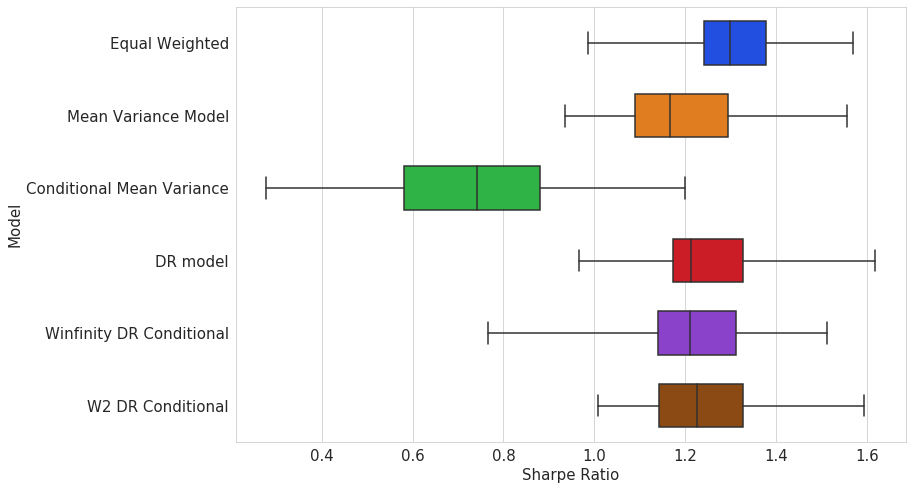

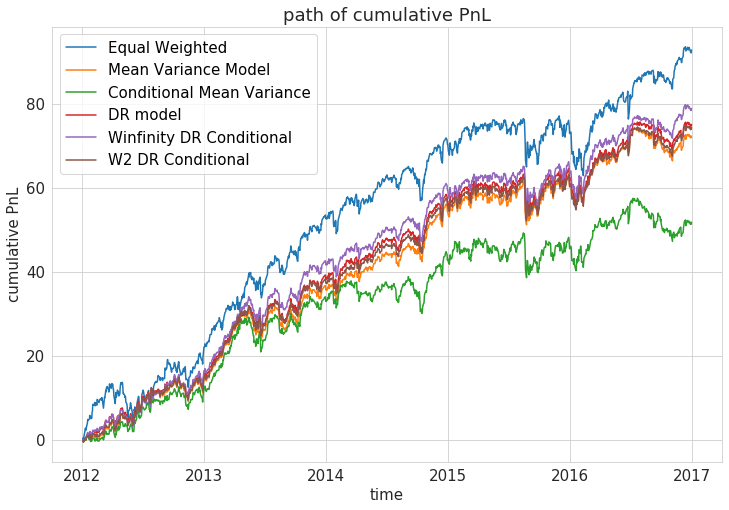

Sharpe Ratio:
Equal Weighted                                    	mean:1.307	std:0.130
Mean Variance Model                               	mean:1.201	std:0.166
Conditional Mean Variance                         	mean:0.748	std:0.213
DR model                                          	mean:1.262	std:0.156
Winfinity DR Conditional                          	mean:1.228	std:0.168
W2 DR Conditional                                 	mean:1.249	std:0.163
PnL stats:
Equal Weighted                                    	mean:0.074	std:0.900
Mean Variance Model                               	mean:0.057	std:0.759
Conditional Mean Variance                         	mean:0.041	std:0.876
DR model                                          	mean:0.060	std:0.752
Winfinity DR Conditional                          	mean:0.063	std:0.813
W2 DR Conditional                                 	mean:0.059	std:0.752


In [7]:
utils.backtest_result.plot_backtest_result(
    exp_num=30, 
    seed=42, 
    model_config_list = [equal_weight_model,
                        mean_variance_model,
                        conditional_model,
                        DR_model,
                        Winf_DR_conditional_model,
                        W2_DR_conditional_model])

In [8]:
W2_DR_conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'W2 DR Conditional',
    solver = solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel, 
    reg_params = 1, 
    epsilon = 0.5, 
    rho_div_rho_min = 1.1
)

In [9]:
utils.backtest_result.read_single_solver_backtest_result(50, 42, DR_model)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2012-01-03,-0.457841,-0.012113,-0.264536,-0.534996,-0.542599,-0.858144,0.024762,-0.047180,-0.037212,0.235181,...,-0.003895,0.014985,-0.346716,-0.090301,-0.592296,-0.059414,-0.366880,0.420452,-0.508116,0.383165
2012-01-04,0.580111,0.678326,0.195021,-0.147101,0.122525,0.111394,0.245408,0.044686,-0.222760,0.333216,...,0.644007,0.115941,0.092072,0.076075,0.739637,0.755794,0.093762,0.670073,0.523936,0.024729
2012-01-05,0.238337,-0.231717,-0.413790,-0.471909,-0.047380,-0.295371,-0.347546,-0.380655,-0.616769,-0.567355,...,0.018427,0.043096,0.129879,-0.106507,-0.447266,-0.248901,-0.223697,0.573333,-0.300402,0.018547
2012-01-06,0.160407,0.631884,-0.056549,0.391113,-0.154876,0.076482,-0.078553,0.581083,0.168706,0.017408,...,-0.321283,0.397278,0.202464,-0.022755,0.135518,0.191121,-0.080552,0.473014,0.278859,0.230794
2012-01-09,1.375131,0.554813,0.530667,0.525346,0.565822,0.862973,0.430451,0.924343,0.209117,0.774482,...,0.557948,0.591949,1.090937,0.624043,0.628753,0.305377,1.084349,0.631321,0.642137,1.000477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,0.166852,0.248669,0.258380,0.287139,0.217730,0.185187,0.144259,0.141712,-0.083254,0.241730,...,0.165962,0.062040,0.245919,0.500057,0.156485,0.070973,-0.032909,0.479253,0.555923,0.139469
2016-12-27,-0.984323,-0.901450,-0.912680,-0.677315,-0.726481,-0.709871,-0.629448,-0.843866,-0.631244,-0.614123,...,-0.807672,-0.746821,-0.601508,-0.954462,-0.723647,-0.832148,-0.573968,-0.889628,-0.757216,-0.783497
2016-12-28,0.369732,-0.113189,0.329779,0.348532,0.551413,0.576911,0.200772,0.599498,0.141760,0.813200,...,0.325846,0.106516,0.103642,0.424818,0.521563,0.457847,0.367548,0.448386,0.588195,0.271056
2016-12-29,-0.176325,-0.496570,-0.226409,-0.255277,-0.574344,-0.119442,-0.414178,-0.409664,-0.182495,-0.870328,...,-0.302637,-0.368623,-0.418862,-0.556245,-0.408598,-0.408278,-0.412262,-0.614314,-0.760378,-0.209601


In [28]:
solver, solver_name_prefix, solver_kwargs = W2_DR_conditional_model.solver, W2_DR_conditional_model.solver_name_prefix, W2_DR_conditional_model.solver_kwargs
exp = 10; seed = 42
file_fmt = utils.path.get_file_path_and_create_dir(exp, seed, solver, solver_name_prefix, **solver_kwargs)
pd.read_pickle(file_fmt.format('stock_weights')).loc['20130207']

600378.SH    1.074955e-03
002320.SZ    1.592882e-08
000622.SZ    9.474688e-01
000767.SZ    1.332809e-02
600757.SH    1.330085e-07
002321.SZ    7.061296e-04
000815.SZ    9.821986e-03
600581.SH    2.990984e-09
600871.SH    1.043127e-08
600028.SH    2.759967e-02
600761.SH    1.266022e-08
600644.SH    8.063451e-09
600262.SH    1.046742e-08
000850.SZ    1.067550e-08
600721.SH    5.982906e-09
600395.SH    1.069959e-08
600368.SH    1.523543e-08
600426.SH    2.670665e-08
000408.SZ    3.525181e-08
600890.SH    6.780573e-08
Name: 2013-02-07 00:00:00, dtype: float64

# Start cross validation plot

In [6]:
exp_num = 50
seed = 42
DRCME_inf_params = {
    'model_name': ['DRCMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRconditionalmeanvariance.DR_Winfty_conditional_mean_variance_long_only_opt_cvx_kernel], 
    'start_index':['2012'],
    'end_index':['2014'],
    'reg_params':[1], 
    'gamma_quantile':[0.1, 0.25, 0.5], 
    'rho_quantile':[0.05, 0.1, 0.25], 
}
DRCME_2_params = {
    'model_name': ['OTCMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel_new], 
    'start_index':['2012'],
    'end_index':['2014'],
    'reg_params':[1], 
    'epsilon':[0.2], 
    'rho_div_rho_min':[1.2]
}
equal_weight_params = {
    'model_name': ['EW'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.simple.equal_weight], 
    'start_index':['2012'],
    'end_index':['2014'],
}
DR_params = {
    'model_name': ['DRMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRmeanvariance.DR_mean_variance_long_only_opt_mosek_kernel_p2], 
    'reg_params':[1],
    'delta': [0.1,0.2,0.5],
    'p': [2],
    'start_index':['2012'],
    'end_index':['2014'],
}
mean_variance_params = {
    'model_name': ['MV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel], 
    'solver_name_prefix': ['vanilla_'],
    'reg_params':[1], 
    'start_index':['2012'],
    'end_index':['2014'],
}
conditional_mean_variance_params = {
    'model_name': ['CMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel], 
    'solver_name_prefix': ['fama_french_'],
    'reg_params':[1], 
    'start_index':['2012'],
    'end_index':['2014'],
}

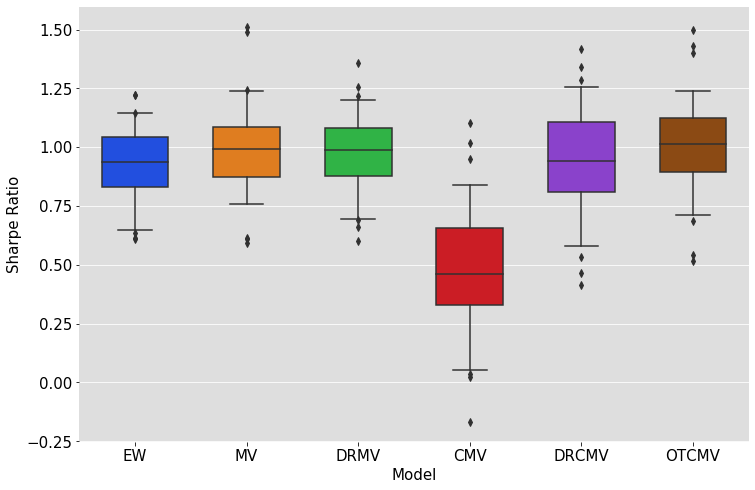

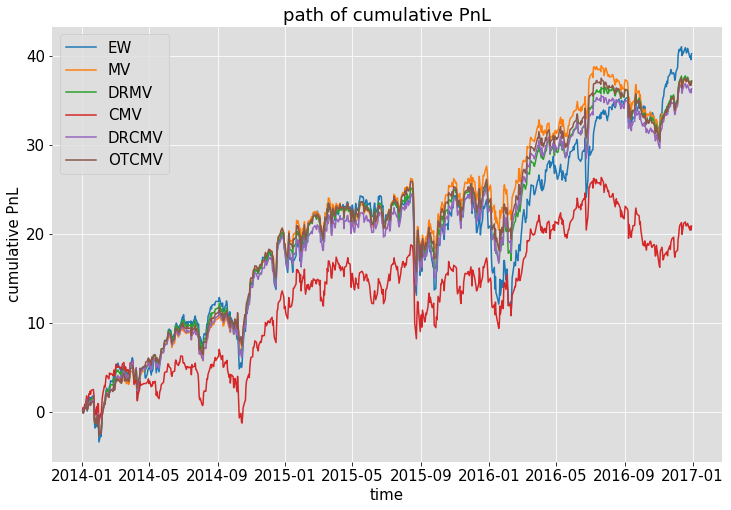

Sharpe Ratio:
EW                                                	mean:0.923	std:0.156
MV                                                	mean:0.995	std:0.188
DRMV                                              	mean:0.976	std:0.157
CMV                                               	mean:0.484	std:0.261
DRCMV                                             	mean:0.936	std:0.232
OTCMV                                             	mean:1.006	std:0.209
PnL stats:
EW                                                	mean:0.053	std:0.921
MV                                                	mean:0.049	std:0.782
DRMV                                              	mean:0.049	std:0.803
CMV                                               	mean:0.028	std:0.910
DRCMV                                             	mean:0.048	std:0.818
OTCMV                                             	mean:0.049	std:0.778
stock weights sparsity:
EW                                                	mean:15.015	std:8.652
MV            

In [18]:
utils.backtest_result.plot_backtest_cross_validation_result(exp_num, seed, [equal_weight_params,
                                                                            mean_variance_params,
                                                                            DR_params,
                                                                            conditional_mean_variance_params,
                                                                            DRCME_inf_params,
                                                                            DRCME_2_params])

In [12]:
exp_num = 50
seed = 42
DRCME_inf_params = {
    'model_name': ['DRCMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRconditionalmeanvariance.DR_Winfty_conditional_mean_variance_long_only_opt_cvx_kernel], 
    'start_index':['2012'],
    'end_index':['2014'],
    'reg_params':[2], 
    'gamma_quantile':[0.1, 0.25, 0.5], 
    'rho_quantile':[0.05, 0.1, 0.25], 
}
DRCME_2_params = {
    'model_name': ['OTCMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel_new], 
    'start_index':['2012'],
    'end_index':['2014'],
    'reg_params':[2], 
    'epsilon':[0.2], 
    'rho_div_rho_min':[1.2]
}
equal_weight_params = {
    'model_name': ['EW'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.simple.equal_weight], 
    'start_index':['2012'],
    'end_index':['2014'],
}
DR_params = {
    'model_name': ['DRMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.DRmeanvariance.DR_mean_variance_long_only_opt_mosek_kernel_p2], 
    'reg_params':[2],
    'delta': [0.1,0.2,0.5],
    'p': [2],
    'start_index':['2012'],
    'end_index':['2014'],
}
mean_variance_params = {
    'model_name': ['MV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel], 
    'solver_name_prefix': ['vanilla_'],
    'reg_params':[2], 
    'start_index':['2012'],
    'end_index':['2014'],
}
conditional_mean_variance_params = {
    'model_name': ['CMV'],
    'exp_num':[50], 
    'sample_stock_num':[20], 
    'solver':[solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel], 
    'solver_name_prefix': ['fama_french_'],
    'reg_params':[2], 
    'start_index':['2012'],
    'end_index':['2014'],
}

In [8]:
plt.rc('axes', facecolor='#dedede', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('patch', edgecolor='#dedede')
plt.rcParams['figure.figsize'] = 8,6
plt.rcParams['font.size'] = 14
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

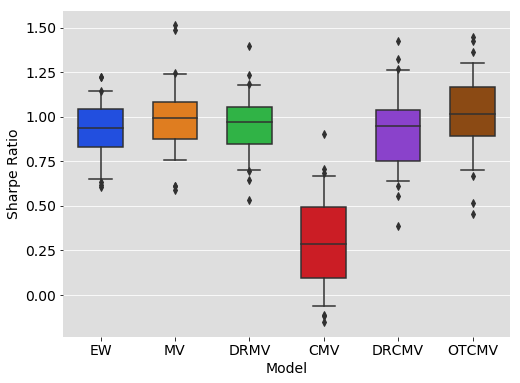

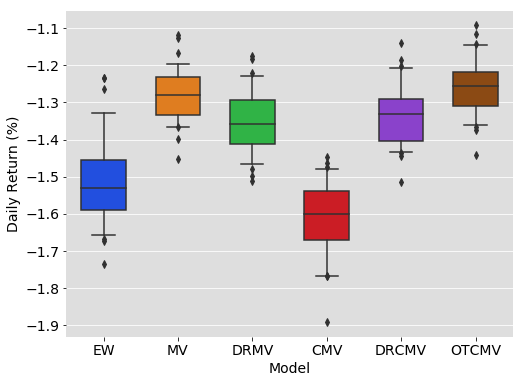

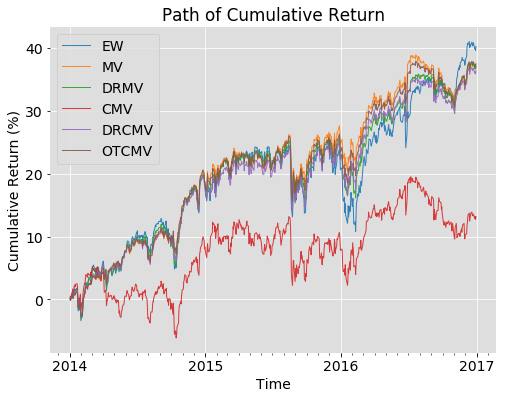

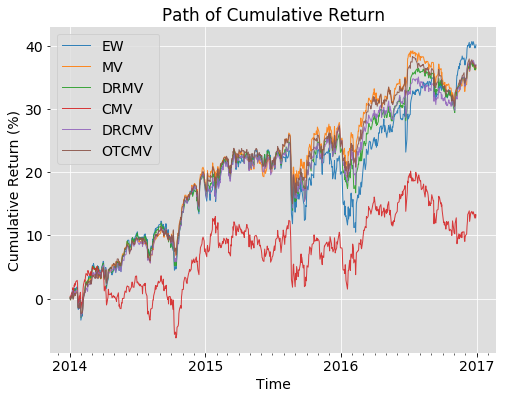

Sharpe Ratio:
EW                                                	mean:0.923	std:0.156
MV                                                	mean:0.995	std:0.188
DRMV                                              	mean:0.949	std:0.161
CMV                                               	mean:0.282	std:0.255
DRCMV                                             	mean:0.933	std:0.223
OTCMV                                             	mean:1.015	std:0.212
PnL stats:
EW                                                	mean:0.053	std:0.921
MV                                                	mean:0.049	std:0.782
DRMV                                              	mean:0.049	std:0.823
CMV                                               	mean:0.017	std:0.983
DRCMV                                             	mean:0.048	std:0.823
OTCMV                                             	mean:0.050	std:0.779
stock weights sparsity:
EW                                                	mean:15.015	std:8.652
MV            

In [14]:
utils.backtest_result.plot_backtest_cross_validation_result(exp_num, seed, [equal_weight_params,
                                                                            mean_variance_params,
                                                                            DR_params,
                                                                            conditional_mean_variance_params,
                                                                            DRCME_inf_params,
                                                                            DRCME_2_params])

# Random Test

In [39]:
conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'Conditional Mean Variance',
    solver = solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
    solver_name_prefix = 'vanilla_',
    reg_params = 1
)
utils.backtest_result.read_single_solver_single_exp_weight(0, 42, conditional_model)['2012':'2013']

,NSC,APA,PHM,TT,EQIX,HIG,FDX,CTSH,TSCO,AMP,COG,MRK,DXC,RMD,SRE,BAX,FFIV,PRGO,MYL,CNC
2012-01-03,3.255933e-10,7.389591e-12,-4.030787e-11,3.176804e-11,2.828305e-10,-5.241976e-11,6.849222e-11,1.036173e-10,0.098381,-2.201540e-11,1.284680e-11,0.283513,4.433596e-11,0.011413,0.469764,0.097529,0.0,0.039400,1.604086e-10,0.0
2012-01-04,9.006588e-09,1.503854e-10,-1.119712e-09,8.014852e-10,7.250385e-09,-1.446320e-09,1.807154e-09,2.704873e-09,0.099019,-6.403495e-10,3.424684e-10,0.283237,1.160737e-09,0.009359,0.474991,0.096813,0.0,0.036581,4.133536e-09,0.0
2012-01-05,1.453774e-12,1.160863e-13,-9.166141e-14,2.343553e-13,1.362363e-12,-1.511759e-13,3.756043e-13,5.257376e-13,0.096309,-1.524072e-14,1.528835e-13,0.272758,2.575231e-13,0.014655,0.481013,0.093569,0.0,0.041696,7.837214e-13,0.0
2012-01-06,8.332514e-10,8.671284e-12,-1.181382e-10,8.558452e-11,7.509966e-10,-1.561649e-10,1.784055e-10,2.614600e-10,0.096749,-7.157657e-11,3.233207e-11,0.265842,1.145024e-10,0.010975,0.488856,0.094558,0.0,0.043021,4.338400e-10,0.0
2012-01-09,9.349024e-10,1.109579e-11,-1.407104e-10,9.259435e-11,9.454898e-10,-1.827745e-10,1.972614e-10,2.981893e-10,0.096624,-8.643951e-11,3.306178e-11,0.265857,1.301700e-10,0.010907,0.490862,0.091157,0.0,0.044593,5.471605e-10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-24,1.129243e-14,4.088118e-15,3.691117e-16,6.390552e-03,5.042597e-15,3.154923e-15,2.179528e-02,1.159500e-02,0.052378,2.485909e-15,2.086071e-02,0.207031,6.769820e-03,0.049889,0.342685,0.146784,0.0,0.087153,4.666920e-02,0.0
2013-12-26,5.423876e-10,1.885942e-10,1.230657e-11,4.105855e-03,2.368471e-10,1.507665e-10,2.167650e-02,1.101178e-02,0.050667,1.174976e-10,2.020422e-02,0.207849,1.267194e-02,0.049173,0.338007,0.148804,0.0,0.087479,4.835045e-02,0.0
2013-12-27,1.121292e-10,4.457587e-11,3.796271e-12,9.479108e-03,5.345722e-11,3.314009e-11,2.476151e-02,1.120462e-02,0.048638,2.607455e-11,2.104607e-02,0.207293,1.254774e-02,0.048313,0.338088,0.145072,0.0,0.090436,4.312128e-02,0.0
2013-12-30,5.046462e-10,1.986361e-10,1.499684e-11,9.768570e-03,2.390699e-10,1.609765e-10,2.463755e-02,9.626892e-03,0.049964,1.301973e-10,2.135109e-02,0.204419,1.201355e-02,0.047122,0.337954,0.144106,0.0,0.093524,4.551379e-02,0.0


In [28]:
Winf_DR_conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'Winfinity DR Conditional',
    solver = solvers.DRconditionalmeanvariance.DR_Winfty_conditional_mean_variance_long_only_opt_cvx_kernel, 
    reg_params = 1, 
    gamma_quantile = 0.25,
    rho_quantile = 0.1
)
utils.backtest_result.read_single_solver_single_exp_weight(0, 42, Winf_DR_conditional_model)

,NSC,APA,PHM,TT,EQIX,HIG,FDX,CTSH,TSCO,AMP,COG,MRK,DXC,RMD,SRE,BAX,FFIV,PRGO,MYL,CNC
2012-01-03,2.264083e-09,0.000000e+00,2.561645e-09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.542637e-09,0.0,0.000000,2.751832e-01,2.202844e-03,9.813582e-02,0.463610,0.031992,0.000000e+00,0.128876,0.000000e+00,6.708665e-09
2012-01-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.652493e-09,0.0,0.000000,3.026537e-01,0.000000e+00,9.730140e-10,0.463842,0.164485,0.000000e+00,0.069020,0.000000e+00,0.000000e+00
2012-01-05,1.441272e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.882597e-08,0.000000,0.000000e+00,2.729427e-09,1.003499e-02,0.0,0.000000,1.640554e-01,0.000000e+00,1.493821e-01,0.284312,0.147608,0.000000e+00,0.131532,0.000000e+00,1.130760e-01
2012-01-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,8.275204e-10,0.0,0.000000,2.190453e-01,3.379960e-09,1.732584e-01,0.339783,0.132795,0.000000e+00,0.078032,0.000000e+00,5.708638e-02
2012-01-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.289781e-09,0.000000,0.000000e+00,3.827108e-09,9.953967e-10,0.0,0.000000,2.440660e-01,4.495700e-03,1.654548e-01,0.295307,0.112154,0.000000e+00,0.085480,1.283179e-08,9.304249e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,9.561562e-02,3.562962e-08,3.131252e-02,7.715046e-02,1.298094e-01,0.051129,8.021894e-09,0.000000e+00,9.378899e-02,0.0,0.030703,4.177386e-08,5.434501e-03,1.167547e-02,0.225829,0.146311,2.607304e-02,0.075168,0.000000e+00,0.000000e+00
2016-12-27,7.865749e-02,2.572926e-02,5.161786e-11,1.498356e-09,1.271995e-01,0.123689,2.706004e-08,0.000000e+00,1.152911e-01,0.0,0.025446,7.598083e-02,4.365905e-09,2.897495e-08,0.238719,0.143253,2.873166e-08,0.046035,0.000000e+00,1.922997e-08
2016-12-28,1.282614e-01,0.000000e+00,0.000000e+00,2.542232e-02,9.974539e-02,0.096244,1.104984e-10,1.152979e-02,5.777769e-02,0.0,0.005403,1.242999e-01,9.934388e-02,3.917502e-02,0.084817,0.111646,5.112666e-02,0.065208,0.000000e+00,0.000000e+00
2016-12-29,1.067170e-01,0.000000e+00,1.495183e-10,6.309156e-02,1.386258e-01,0.048321,0.000000e+00,3.235481e-11,4.404150e-02,0.0,0.014690,8.507441e-02,2.784450e-10,5.788556e-02,0.147398,0.134679,9.131344e-02,0.068163,0.000000e+00,0.000000e+00


In [27]:
W2_DR_conditional_model = utils.backtest_result.ModelConfig(
    model_name = 'W2 DR Conditional',
    solver = solvers.DRconditionalmeanvariance.DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel, 
    reg_params = 1, 
    epsilon = 0.1, 
    rho_div_rho_min = 1.1
)
utils.backtest_result.read_single_solver_single_exp_weight(22, 42, W2_DR_conditional_model)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Fan\\Dropbox\\CMB_data_exp\\USDaily/portfolio_res/DR_W2_conditional_mean_variance_long_only_opt_cvx_kernel/epsilon=0.1/reg_params=1/rho_div_rho_min=1.1/stock_weights_seed=42_exp=22.pkl'